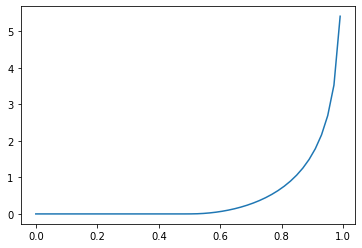

In [34]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


TS_array = np.linspace(0, 50, 10000)
cdf_TS = stats.chi2.cdf(TS_array, 1) / 2 + 0.5
from scipy.interpolate import interp1d
f = interp1d(cdf_TS, TS_array, bounds_error=False, fill_value=0.)
x = np.linspace(0, 0.99, 50)
plt.plot(x, f(x))

In [59]:
N_TS = 200000
TS_sum = np.zeros(N_TS)
for i in np.arange(N_TS):
    TS_sum[i] = f(np.random.rand()) + f(np.random.rand()) + f(np.random.rand())

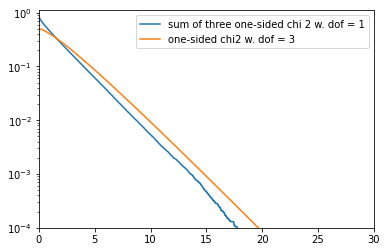

In [65]:
p_TS = np.histogram(TS_sum, bins=TS_array)[0] / float(N_TS)
TS_c = (TS_array[0:-1] + TS_array[1:])/2.
plt.plot(TS_c, 1-np.cumsum(p_TS), label='sum of three one-sided chi 2 w. dof = 1')
plt.plot(TS_c, 1-(0.5 + stats.chi2.cdf(TS_c, 3) / 2), label='one-sided chi2 w. dof = 3')
plt.yscale('log')
plt.ylim(1e-4, 1.1)
plt.xlim(0,30)
plt.legend()